In [1]:
#!/usr/bin/env python
"""choose_skies.ipynb: a notebook to create and examine GW backgrounds """

__author__ = "Chiara M. F. Mingarelli"
__copyright__ = "Copyright 2016, GWASAP project"
__credits__ = ["Chiara Mingarelli", "Stephen Taylor"]
__license__ = "GPL"
__version__ = "0.0.1"
__maintainer__ = "Chiara Mingarelli"
__email__ = "mingarelli@gmail.com"


In [2]:
from __future__ import division
from IPython.display import display, Math, Latex
import math
from math import sqrt, cos, sin, pi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as ml
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator
import matplotlib.ticker
import matplotlib.colors
from matplotlib.font_manager import FontProperties
from matplotlib import rc, text
import healpy as hp
import plot_mpl2 as plot
from astropy.io import fits

import AnisCoefficients_pix as cbylm_pix 

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [3]:
"""NUMBER OF DETECTED SKIES PER RELAIZTAION"""
#0.29 dex = 352/115,281 -- 0.003

'NUMBER OF DETECTED SKIES PER RELAIZTAION'

In [4]:
freq_choice = np.loadtxt("../gw_freqs1.dat") #available GW frequencies

In [5]:
#gets data from ALL final skies
final_file = np.genfromtxt("../../detectedSkies/final_skies/kh13_mbul_29_final.txt")
final_galname = np.genfromtxt("../../detectedSkies/final_skies/kh13_mbul_29_final.txt", usecols = 0, dtype='str')
final_filename = np.genfromtxt("../../detectedSkies/final_skies/kh13_mbul_29_final.txt", usecols = -1, dtype='str')
final_size = len(final_file)
print(final_size)

352


In [6]:
#finds the loudest source from all the detectable sources from final skies
final_strain = final_file[:,6]
loudest_index = final_strain.argmax()
loudest_galname = final_galname[loudest_index]
loudest_filename = final_filename[loudest_index]
print(loudest_index)
print(loudest_galname)
print(loudest_filename)

241
NGC1316
b'KH13_90747.txt'


In [7]:
#get RA and DEC for each "final" source
final_RA = np.zeros(final_size)
final_DEC =np.zeros(final_size)

for i in range(final_size):
    peek_file = np.genfromtxt("../../rusty_data/KH13_Reg/29_dex/"+(str(str(final_filename[i])[2:-1])))
    names = np.genfromtxt("../../rusty_data/KH13_Reg/29_dex/"+(str(str(final_filename[i])[2:-1])), usecols = 6, dtype='str')
    want_index = np.where(names==final_galname[i])[0][0]
    peek_RAs = peek_file[:,0]
    peek_DECs = peek_file[:,1]
    final_RA[i] = peek_RAs[want_index]
    final_DEC[i] = peek_DECs[want_index]

In [ ]:
# source sky, the sky with the loudest source 

sim_sky_all = np.genfromtxt("../../rusty_data/KH13_Reg/29_dex/"+(str(str(loudest_filename)[2:-1])))
RA_tot_all = sim_sky_all[:,0] #phi, add pi to this for healpix maps
DEC_tot_all = sim_sky_all[:,1] #theta
freq_all = sim_sky_all[:,2]
strain_vec_all = sim_sky_all[:,3]
file_size_all = strain_vec_all.size # number of galaxies in file



In [ ]:
print(loudest_filename)

In [11]:
# source sky, RANDOM

sim_sky_all = np.genfromtxt("../../rusty_data/KH13_Reg/29_dex/KH13_90126.txt")
RA_tot_all = sim_sky_all[:,0] #phi, add pi to this for healpix maps
DEC_tot_all = sim_sky_all[:,1] #theta
freq_all = sim_sky_all[:,2]
strain_vec_all = sim_sky_all[:,3]
file_size_all = strain_vec_all.size # number of galaxies in file



In [12]:
len(strain_vec_all)

20

In [ ]:
"""find index of loudest source"""
#don't run if doing random example
source_index = strain_vec_all.argmax()
source_RA = RA_tot_all[source_index]
source_DEC = DEC_tot_all[source_index]

In [ ]:
# remove loudest source from the sky to get noise
#don't run if doing randomal example
sim_sky_noise = np.delete(sim_sky_all, source_index, axis = 0)
RA_tot_noise = sim_sky_noise[:,0] #phi, add pi to this for healpix maps
DEC_tot_noise = sim_sky_noise[:,1] #theta
freq_noise = sim_sky_noise[:,2]
strain_vec_noise = sim_sky_noise[:,3]
file_size_noise = strain_vec_noise.size # number of galaxies in file


In [ ]:
file_size_all

In [ ]:
# A map of the sky realization where the detection was made

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


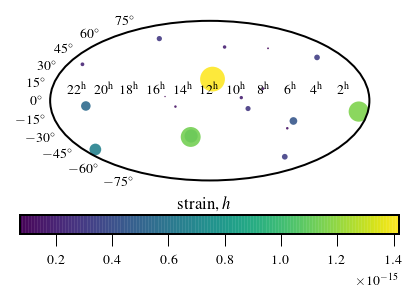

In [23]:
ax = plt.subplot(111, projection='astro mollweide')

# plot "noise" map (GW sky with 2 loud sources removed)

maxstrain = np.amax(strain_vec_all)
colors = (strain_vec_all) # make colors vary with respect to strain
area = pi * (7*strain_vec_all/maxstrain)**2  # adapt circles with 0 to 15 point radii



# labels
plt.suptitle(r'strain, $h$', y=0.3)
sc = plt.scatter(RA_tot_all, DEC_tot_all, c = colors, cmap = 'viridis', alpha = 0.9, edgecolors='none',s=area)


#plt.scatter(source_RA, source_DEC, color ='yellow', marker = '*', s=100, edgecolor = "black", lw =0.2)

plt.colorbar(sc, orientation = 'horizontal')
#plt.savefig("plots_kh13_29/step_4/"+str(loudest_galname)+"_mapWsource.pdf")
plt.savefig("plots_bul_29/step_4/random_final_mapWsource.pdf")



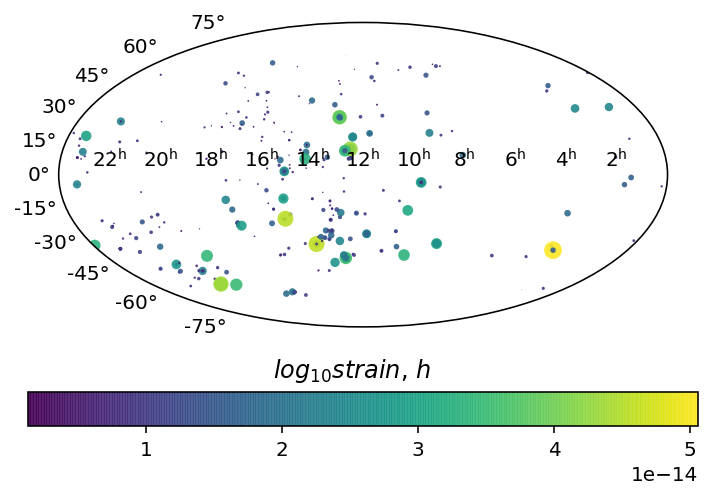

In [14]:
#plot all final ones
ax = plt.subplot(111, projection='astro mollweide')

# plot "noise" map (GW sky with 2 loud sources removed)

#log_strain = np.log10(final_strain)
maxstrain = np.amax(final_strain)
colors = (final_strain) # make colors vary with respect to strain

area = pi * (5*final_strain/maxstrain)**2  # adapt circles with 0 to 15 point radii

# labels
plt.suptitle(r'$log_{10}strain$, $h$', y=0.3)
sc = plt.scatter(final_RA, final_DEC, c = colors, cmap = 'viridis', alpha = 0.9, edgecolors='none',s=area)

#plt.scatter(source_RA, source_DEC, color ='yellow', marker = '*', s=100, edgecolor = "black", lw =0.2)

plt.colorbar(sc, orientation = 'horizontal')
#plt.savefig("plots_kh13_29/step_4/"+str(loudest_galname)+"_mapWsource.pdf")
plt.savefig("plots_kh13_29/step_4/all_final_mapWsource.pdf")




In [ ]:
# What does the GW background look like from this sky?

In [14]:
def h2_c(hk, fk, deltaF):
    """
    Eq 35 Babak et al. 2016; 
    Given a sky of strains at certain frequencies,
    what is it in terms of a GW background?
    returns h^2_c
    """
    h2k = np.square(hk)
    ans = h2k*fk/deltaF
    return ans


def pol2cart(lon, lat): 
    """ 
    Utility function to convert longitude,latitude on a unit sphere to 
    cartesian co-ordinates.

    """ 

    x = np.cos(lat)*np.cos(lon) 
    y = np.cos(lat)*np.sin(lon) 
    z = np.sin(lat) 

    return np.array([x,y,z])


def greedy_bin_sky(skypos, skycarts, weights=None):
    """

    Greedy binning algorithm

    """

    N = len(skycarts) 
    skycarts = np.array(skycarts)
    bins = np.zeros(N)
    ct = 0
    for raSample, decSample in skypos: 
        sampcart = pol2cart(raSample, decSample) 
        dx = np.dot(skycarts, sampcart)
        maxdx = np.argmax(dx)

        if weights is not None:
            bins[maxdx] += weights[ct]
        else:
            bins[maxdx] += 1

        ct += 1

    # fill in skymap
    histIndices = np.argsort(bins)[::-1]    # in decreasing order
    NSamples = len(skypos)

    frac = 0.0
    skymap = np.zeros(N)
    for i in histIndices:
        frac = float(bins[i]) # /float(NSamples) 
        skymap[i] = frac

    return skymap


def plotSkyMap(raSample, decSample, nside=64, contours=None, colorbar=True, \
              inj=None, weights=None, psrs=None):
    """

    Plot Skymap of chain samples on Mollwiede projection.

    @param raSample: Array of right ascension samples
    @param decSample: Array of declination  samples
    @param nside: Number of pixels across equator [default = 64]
    @param contours: Confidence contours to draw eg. 68%, 95% etc
                     By default this is set to none and no contours
                     will be drawn.
    @param colorbar: Boolean option to draw colorbar [default = True]
    @param inj: list of injected values [ra, dec] in radians to plot
                [default = None]
    @param weights: sample weights [default = None]
    @param psrs: Stacked array of pulsar sky locations [ra, dec] in radians
                 [default=None] Will plot as white diamonds

    """

    # clear figures
    plt.clf()

    # create stacked array of ra and dec
    skypos = np.column_stack([raSample, decSample])

    npix = hp.nside2npix(nside)    # number of pixels total


    # initialize theta and phi map coordinantes
    skycarts=[]
    for ii in range(npix):
        skycarts.append(np.array(hp.pix2vec(nside,ii)))

    # get skymap values from greedy binning algorithm
    skymap = greedy_bin_sky(skypos, skycarts, weights)

    # smooth skymap (ON for sky maps/ OFF for cl)
    skymap = hp.smoothing(skymap, 0.1)

    # make plot
    ax = plt.subplot(111, projection='astro mollweide')

    # plot map
    #ax.grid()
    #plot.outline_text(ax)
    plot.healpix_heatmap(skymap, cmap = 'viridis')

    return skymap
    # save skymap
    #plt.savefig('skymap.pdf', bbox_inches='tight')

In [15]:
T = 315360000*2.5 # 25 years in seconds, consistent with EPTA data
dF = 1/T

In [16]:
#
#hc_strain_noise = np.sqrt(h2_c(strain_vec_noise, freq_noise, dF))
hc_strain_all = np.sqrt(h2_c(strain_vec_all, freq_all, dF))

In [17]:
hc_strain_noiseLog = np.log10(hc_strain_noise)

NameError: name 'hc_strain_noise' is not defined

Sigma is 145.987664 arcmin (0.042466 rad) 
-> fwhm is 343.774677 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


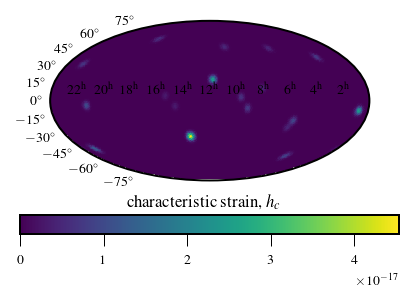

In [21]:
#turn ON SMOOTHING
hpskymap_all = plotSkyMap(RA_tot_all, DEC_tot_all , weights = hc_strain_all)
plt.suptitle(r'characteristic strain, $h_c$', y=0.3)
plt.colorbar(orientation='horizontal')
#plt.savefig('plots_kh13_29/step_4/'+str(loudest_galname)+'_w_all.pdf', bbox_inches='tight')
plt.savefig('plots_bul_29/step_4/random_all.pdf', bbox_inches='tight')

In [ ]:
# don't run for random
#hpskymap_noise = plotSkyMap(RA_tot_noise, DEC_tot_noise , weights = hc_strain_noise)
plt.suptitle(r'characteristic strain, $h_c$', y=0.3)
plt.colorbar( orientation='horizontal')
plt.savefig('plots_kh13_29/step_4/'+str(loudest_galname)+'_only_noise.pdf', bbox_inches='tight')

In [ ]:
"""TURN OFF SMOOTH"""

In [ ]:
hp.pixelfunc.remove_monopole(hpskymap_all)

In [ ]:
# create alm map form healpix map
alm_map_noise = hp.map2alm(hpskymap_noise,lmax=10)
alm_map_all = hp.map2alm(hpskymap_all,lmax=10)

# make a map in terms of \ell from the alm map
hpskymap_lmax_noise = hp.alm2map(alm_map_noise,nside=64)
hpskymap_lmax_all = hp.alm2map(alm_map_all,nside=64)

In [ ]:
plotSkyMap(RA_tot_all, DEC_tot_all, weights = hpskymap_lmax_noise)
plt.colorbar(orientation='horizontal')
#plt.savefig('plots_kh13_29/step_4/'+str(loudest_galname)+'_skymap.pdf', bbox_inches='tight')

In [ ]:
hpskymap_lmax_noise[hpskymap_lmax_noise < 0.0] = 0.0
hpskymap_lmax_all[hpskymap_lmax_all < 0.0] = 0.0

In [ ]:
# What does this sky look like in terms of an anisotropic background?

In [ ]:
# h^2_c for C_l decomposition

hpskymap2_noise = plotSkyMap(RA_tot_noise, DEC_tot_noise , weights = hc_strain_noise**2)
hpskymap2_all = plotSkyMap(RA_tot_all, DEC_tot_all, weights = hc_strain_all**2)

# create alm map form healpix map

alm_map2_noise = hp.map2alm(hpskymap2_noise,lmax=10)
alm_map2_all = hp.map2alm(hpskymap2_all,lmax=10)

# make a map in terms of \ell from the alm map

hpskymap_lmax2_noise = hp.alm2map(alm_map2_noise,nside=64)
hpskymap_lmax2_all = hp.alm2map(alm_map2_all,nside=64)


In [ ]:
## Decompose this onto real spherical harmonics with our standard normalisations
lmax = 50

clm_noise = cbylm_pix.clmFromMap_fast(hpskymap2_noise, lmax)
clm_all = cbylm_pix.clmFromMap_fast(hpskymap2_all, lmax)

In [ ]:
## Make the angular power spectrum, Cl = \sum_m |clm|^2 / (2l+1)

Cl_all = np.zeros(lmax+1)
for ll in range(0,lmax+1):
    Cl_all[ll] = np.sum(clm_all[ll**2:(ll+1)**2]**2.0) / (2.0*ll+1.0) / (4.0*pi)

In [ ]:
## Make the angular power spectrum, Cl = \sum_m |clm|^2 / (2l+1)

Cl_noise = np.zeros(lmax+1)
for ll in range(0,lmax+1):
    Cl_noise[ll] = np.sum(clm_noise[ll**2:(ll+1)**2]**2.0) / (2.0*ll+1.0) / (4.0*pi)

In [20]:
# plotting preamble (credit J. Ellis)

fig_width_pt = 245.27 #513.17           # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 2,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.0,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        'font.family': 'serif',
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True,
        #'axes.color_cycle': ['b', 'lime', 'r', 'purple', 'g', 'c', 'm', 'orange', 'darkblue', \
        #                        'darkcyan', 'y','orangered','chartreuse','brown','deeppink','lightgreen', 'k'],
        #'font.serif':cm,
        'figure.figsize': fig_size}
plt.rcParams.update(params)

In [ ]:
## Let's take a look
##TURN OFF SMOOTH

fig, ax = plt.subplots() 
ax.plot(np.arange(0,lmax+1),Cl_all/Cl_all[0], label = "All sky",  lw=1.5)
ax.plot(np.arange(0,lmax+1),Cl_noise/Cl_noise[0], label = "Sky without NGC5959", lw=1.5,linestyle = '-.')
ax.set_xlabel('$\ell$')
ax.set_ylabel('$C_\ell/C_{0}$')
ax.minorticks_on()
plt.axvline(x=4, ymin=0, ymax = 1, linewidth=1.0, linestyle =":", label = "PTA angular resolution", c='g')
ax.legend(loc='best',frameon=False)
plt.xlim(0,50)
plt.savefig('plots_kh13_29/step_4/Cl_'+str(loudest_galname)+'_wLimit_NO_SMOOTH.pdf',bbox_inches='tight')